In [1]:
setwd('../')

#### Setup for severe - non-severe patients

In [2]:
phenotype <- "severe" # "severe" for severe-only analysis, "notsevere" for non-severe genes.

destfile= "Plots/Figure4_" #Directory destination and name of the csv and pdf files that will be retrieved as output.

 
#libraries needed:
library("AnnotationDbi")
library("AnnotationDbi")
library("org.Hs.eg.db")
library("igraph")

Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain 

### Read Community structure output files from MolTi

In [3]:
cero <- readLines("data/MolTi/Community_Analysis/CommunitiesResolution0MultilayerNetwork5112018.csv")
cero <- strsplit(cero,"\t")
cerocinco <- readLines("data/MolTi/Community_Analysis/CommunitiesResolution05MultilayerNetwork5112018.csv")
cerocinco <- strsplit(cerocinco,"\t")
uno <- readLines("data/MolTi/Community_Analysis/CommunitiesResolution1MultilayerNetwork5112018.csv")
uno <- strsplit(uno,"\t")
unocinco <- readLines("data/MolTi/Community_Analysis/CommunitiesResolution15MultilayerNetwork5112018.csv")
unocinco <- strsplit(unocinco,"\t")
dos <- readLines("data/MolTi/Community_Analysis/CommunitiesResolution2MultilayerNetwork5112018.csv")
dos <- strsplit(dos,"\t")
doscinco <- readLines("data/MolTi/Community_Analysis/CommunitiesResolution25MultilayerNetwork5112018.csv")
doscinco <- strsplit(doscinco,"\t")
tres <- readLines("data/MolTi/Community_Analysis/CommunitiesResolution3MultilayerNetwork5112018.csv")
tres <- strsplit(tres,"\t")
trescinco <- readLines("data/MolTi/Community_Analysis/CommunitiesResolution35MultilayerNetwork5112018.csv")
trescinco <- strsplit(trescinco,"\t")
cuatro <- readLines("data/MolTi/Community_Analysis/CommunitiesResolution4MultilayerNetwork5112018.csv")
cuatro <- strsplit(cuatro,"\t")

In [4]:
lista_comunidades <- list(cero,cerocinco,uno,unocinco,dos,doscinco,tres,trescinco,cuatro)

#### Load  severe diagnosis for each patient

In [5]:
patients2 <- read.table(file= "data/MolTi/Community_Analysis/originalSevereDiagnosis.csv",sep= ",",header= F)
patients2[,1] <- as.character(patients2[,1])
patients2[,2] <- as.character(patients2[,2])
patients2 <- cbind(patients2,0)
patients2[,3] <- sample(patients2[,2])

In [6]:
head(patients2) # Column '0' are the randomized assignments

V1,V2,0
NEW0920,severe,severe
NEW0919,severe,notsevere
NEW0918,severe,severe
NEW0922,severe,notsevere
NEW0909,severe,severe
NEW0908,severe,notsevere


### Retrieve specific Compound Heterozygous Mutations for Severe & Non-severe groups

In [7]:
#Compound Heterozygous mutations
patients <- read.table(file= "data/InputGenes/compound_all_nov2018.csv")
patients[,1] <- as.character(patients[,1])
patients[,2] <- as.character(patients[,2])
patients <- split(patients[,2],patients[,1])
#severepatients <- patients[which(patients2[,3]=="severe")] #Uncomment and comment the next one for randomizing
severepatients <- patients[patients2[,1][which(patients2[,2]=="severe")]] ##Uncomment and comment the previous one for the original plot
#notseverepatients <- patients[which(patients2[,3]=="notsevere")] #Uncomment and comment the next one for randomizing
notseverepatients <- patients[patients2[,1][which(patients2[,2]=="notsevere")]] #Uncomment and comment the previous one for the original plot
severe<- unlist(severepatients)
names(severe) <- NULL
notsevere <- unlist(notseverepatients)
names(notsevere) <- NULL
severeonly <- setdiff(severe,notsevere)
notsevereonly <- setdiff(notsevere,severe)

severepatientsnames <- names(severepatients)
notseverepatientsnames <- names(notseverepatients)

### Retrieve specific Copy Number Variations for Severe & Non-severe groups

In [8]:
cnvdata <- read.csv("data/InputGenes/CNV_genes_for_iker.tsv",sep= "\t")
cnvdata[,"gene"] <- as.character(cnvdata[,"gene"])
genis <- c(cnvdata["gene"])$gene
genis <- mapIds(org.Hs.eg.db,keys = genis,column = "SYMBOL",keytype="ENSEMBL",multiVals = "first")
# Manual mapping for missing IDs
genis["ENSG00000005955"] <- "GGNBP2" 
genis["ENSG00000006114"] <- "SYNGR"
genis["ENSG00000108264"] <- "TADA2A"
genis["ENSG00000108270"] <- "AATF"
genis["ENSG00000108272"] <- "DHRS11"
genis["ENSG00000108278"] <- "ZNHI3"
genis["ENSG00000108753"] <- "HNF1B"
genis["ENSG00000129282"] <- "MRM1"
genis["ENSG00000132130"] <- "LHX1"
genis["ENSG00000141140"] <- "MYO19"
genis["ENSG00000141141"] <- "DDX52"
genis["ENSG00000161326"] <- "DUSP14"
genis["ENSG00000167230"] <- "C17orf78"
genis["ENSG00000174093"] <- "RP11-1407O15.2"
genis["ENSG00000184886"] <- "PIGW"
genis["ENSG00000197681"] <- "TBC1D3"
genis["ENSG00000203815"] <- "FAM231D"
genis["ENSG00000219492"] <- "RP11-1396O31.13"
genis["ENSG00000229924"] <- "FAM90A26"
genis["ENSG00000250913"] <- "USP17L23"
genis["ENSG00000268172"] <- "AL590452.1"
genis <- as.matrix(genis)
rownames(genis) <- NULL
genis <- genis[,1]
cnvdata <- cbind(cnvdata,genis)
severedata <- cnvdata[,c("gene","whole_gene",severepatientsnames,"genis")]
milddata <- cnvdata[,c("gene","whole_gene",notseverepatientsnames,"genis")]

'select()' returned 1:many mapping between keys and columns


In [9]:
severedata <- severedata[apply(X = severedata,MARGIN = 1,function(x) paste0(x[3:10],collapse='_')) != '2_2_2_2_2_2_2_2',]
head(severedata)

,gene,whole_gene,NEW0920,NEW0919,NEW0918,NEW0922,NEW0909,NEW0908,NEW0936,NEW0935,genis
4,ENSG00000042781,FALSE,2,2,2,2,2,2,1,2,USH2A
5,ENSG00000072401,FALSE,2,2,2,2,2,2,1,2,UBE2D1
7,ENSG00000100033,TRUE,2,2,2,2,2,2,2,3,PRODH
9,ENSG00000107018,TRUE,2,3,2,2,2,2,2,2,RLN1
26,ENSG00000151033,FALSE,1,2,2,2,2,2,2,2,LYZL2
28,ENSG00000160072,FALSE,2,1,1,2,2,2,2,2,ATAD3B


In [10]:
milddata <- milddata[apply(X = milddata,MARGIN = 1,function(x) paste0(x[3:10],collapse='_')) != '2_2_2_2_2_2_2_2',]
head(milddata)

,gene,whole_gene,NEW0921,NEW0931,NEW0907,NEW0923,NEW0930,NEW0929,NEW0928,NEW0927,NEW0932,NEW0934,NEW0933,NEW0937,genis
1,ENSG00000005955,TRUE,2,3,2,2,2,2,2,2,2,2,2,2,GGNBP2
2,ENSG00000006114,TRUE,2,3,2,2,2,2,2,2,2,2,2,2,SYNGR
3,ENSG00000038945,FALSE,2,1,2,2,2,2,2,2,2,2,2,2,MSR1
6,ENSG00000090857,FALSE,1,2,2,2,2,2,2,2,2,2,2,2,PDPR
7,ENSG00000100033,TRUE,2,2,3,2,2,2,3,2,2,2,2,2,PRODH
8,ENSG00000100033,TRUE,2,2,2,2,4,2,2,2,2,2,2,2,PRODH


In [11]:
rownames(severedata) <- NULL
rownames(milddata) <- NULL
severecnvs <- unique(as.character(severedata[,"genis"]))
mildcnvs <- unique(as.character(milddata[,"genis"]))
cnvsevereonly <- setdiff(severecnvs,mildcnvs)
cnvsnotsevereonly <- setdiff(mildcnvs,severecnvs)

In [12]:
cnvsevereonly

[1] "USH2A"   "UBE2D1"  "ATAD3B"  "TPCN2"   "AKNAD1"  "CLCNKB"  "CASP12" 
 [8] "PSG5"    "ZNF705B" "DEFB115" "ATAD3C"

### Load CMS Causal genes

In [13]:
cosa <- read.csv("data/InputGenes/cmsgenes.csv",header=FALSE) #http://www.musclegenetable.fr/4DACTION/Blob_groupe2
#cosa <- read.csv("data/InputGenes/genespaper.csv",header=FALSE) #Table PMID:30552423
cosa <- cosa[,1]
cosa <- as.character(cosa)
cosa

[1] "AGRN"    "ALG14"   "ALG2"    "CHAT"    "CHRNA1"  "CHRNB1"  "CHRND"  
 [8] "CHRNE"   "CHRNG"   "COL13A1" "COLQ"    "DOK7"    "DPAGT1"  "GFPT1"  
[15] "GMPPB"   "LAMA5"   "LAMB2"   "LRP4"    "MUSK"    "MYO9A"   "PLEC"   
[22] "PREPL"   "RAPSN"   "RPH3A"   "SCN4A"   "SLC18A3" "SLC25A1" "SLC5A7" 
[29] "SNAP25"  "SYT2"    "UNC13B"  "VAMP1"

In [14]:
severeonly2 <- data.frame(severeonly)
cosa2 <- data.frame(cosa)
cnvsevereonly2 <- data.frame(cnvsevereonly)
notsevereonly2 <- data.frame(notsevereonly)
notcnvsevereonly2 <- data.frame(cnvsnotsevereonly)


severeonly2[,2] <- 'CHVsevereonly'
cosa2[,2] <- 'causal'
cnvsevereonly2[,2] <- 'CNVsevereonly'
notsevereonly2[,2] <- 'CHVnotsevereonly'
notcnvsevereonly2[,2] <- 'CNVsnotsevereonly'

#For Cytoscape plots
write.table(rbind(as.matrix(severeonly2),as.matrix(cnvsevereonly2),as.matrix(cosa2)),file='Cytoscape_Session/SevereMetadata_Figure4_Supp_Fig_6.csv',sep='csv',quote=F,row.names = F,col.names = F)
write.table(rbind(as.matrix(notsevereonly2),as.matrix(notcnvsevereonly2),as.matrix(cosa2)),file='Cytoscape_Session/NOTSevereMetadata_Figure4_Supp_Fig_6.csv',sep='csv',quote=F,row.names = F,col.names = F)


### Join causal and mutated genes

In [15]:
# Setup depending on severity groups
if(phenotype == "severe"){
  algenes <- c(severeonly,cosa,cnvsevereonly) #Severe-Only Analysis 
}
if(phenotype == "notsevere"){
  algenes <- c(notsevereonly,cosa,cnvsnotsevereonly) #To get a Mild-Only  Analysis
}

In [16]:
# Solve some missing gene mappings
if("KIAA1919" %in% algenes){
  algenes <- replace(algenes,algenes== "KIAA1919","MFSD4B")
}
if("FAM188B" %in% algenes){
  algenes <- replace(algenes,algenes== "FAM188B","MINDY4")
}
if("C14orf159" %in% algenes){
  algenes <- replace(algenes,algenes== "C14orf159","DGLUCY")
}
if("C1orf168" %in% algenes){
  algenes <- replace(algenes,algenes== "C1orf168","FYB2")
}
if("IKBKAP" %in% algenes){
  algenes <- replace(algenes,algenes== "IKBKAP","ELP1")
}
if("SYNGR" %in% algenes){
  algenes <- replace(algenes,algenes== "SYNGR","SYNGR1")
}
if("ZNHI3" %in% algenes){
  algenes <- replace(algenes,algenes== "ZNHI3","ZNHIT3")
}
if("FAM231D" %in% algenes){
  algenes <- replace(algenes,algenes== "FAM231D","LINC01145")
}
if("SELO" %in% algenes){
  algenes <- replace(algenes,algenes== "SELO","SELENOO")
}
if("MFSD7" %in% algenes){
  algenes <- replace(algenes,algenes== "MFSD7","SLC49A3")
}

#Convert to entrez
algenes2 <- algenes
algenes <- mapIds(org.Hs.eg.db,keys = algenes,column = "ENTREZID",keytype="SYMBOL",multiVals = "first")
names(algenes) <- NULL

'select()' returned 1:1 mapping between keys and columns


### Create a table with the community ID of each gene in 'genescausales' vector.

In [17]:
genescausales <- mapIds(org.Hs.eg.db,keys = algenes2,column = "ENTREZID",keytype="SYMBOL",multiVals = "first")
  genescausales <- as.matrix(genescausales)
  rownames(genescausales) <- NULL
  genescausales <- genescausales[,1]
  genescausales <- unlist(genescausales) #need this unlist as sometimes R does not create a c() vector with the previous line
  disease <- genescausales
  res <- matrix(nrow= length(unlist(lista_comunidades[[1]],use.names = F)),ncol= 9)
  rownames(res) <- unlist(lista_comunidades[[1]],use.names = F)



'select()' returned 1:1 mapping between keys and columns


In [18]:
head(res)

888860,NA,NA,NA,NA,NA,NA,NA,NA,NA
886981,NA,NA,NA,NA,NA,NA,NA,NA,NA
886865,NA,NA,NA,NA,NA,NA,NA,NA,NA
886624,NA,NA,NA,NA,NA,NA,NA,NA,NA
886174,NA,NA,NA,NA,NA,NA,NA,NA,NA
885594,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [19]:
#Remove genes not present on Multilayer network
curl <- lapply(as.list(genescausales),function(x) which(sapply(cuatro, function(y) x %in% y)))
res <- res[!unlist(lapply(curl,function(x) length(x)==0)),]

In [20]:
head(res)

888860,NA,NA,NA,NA,NA,NA,NA,NA,NA
886865,NA,NA,NA,NA,NA,NA,NA,NA,NA
885594,NA,NA,NA,NA,NA,NA,NA,NA,NA
888192,NA,NA,NA,NA,NA,NA,NA,NA,NA
888777,NA,NA,NA,NA,NA,NA,NA,NA,NA
887215,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [21]:
dim(res)

[1] 17382     9

In [22]:
Sys.time()

[1] "2023-03-23 12:51:48 CET"

In [23]:
for(i in 1:9){
  current <- unlist(lapply(as.list(rownames(res)),function(x) which(sapply(lista_comunidades[[i]], function(y) x %in% y))))
  res[,i] <- current
}

In [24]:
Sys.time()

[1] "2023-03-23 12:53:19 CET"

In [25]:
head(res)

888860,1,9,13,117,222,343,455,574,703
886865,1,9,13,117,222,343,455,574,703
885594,1,9,13,117,222,343,455,574,703
888192,1,9,13,117,222,343,455,574,703
888777,1,9,13,117,222,343,455,574,703
887215,1,9,13,117,222,343,455,574,703


###  Generate Figure 4 graph (+ input graph for Cytoscape)

In [26]:
library(parallelDist)
library(reshape2)

In [27]:
melted_dist <- as.matrix(parallelDist(res,'hamming',threads = 7)*9) #Machine has 8 threads.
diag(melted_dist) <- NA
melted_dist[lower.tri(melted_dist)] <- NA
#head(melted_dist)

In [28]:
genescausales

[1] "375790"    "728819"    "23181"     "440695"    "259308"    "23303"    
  [7] "338785"    "79778"     "284353"    "27031"     "10635"     "6101"     
 [13] "146857"    "56171"     "80206"     "3339"      "7044"      "57701"    
 [19] "4855"      "285368"    "5784"      "6525"      "6725"      "27433"    
 [25] "84970"     "838"       "23312"     "84162"     "11024"     "84695"    
 [31] "4036"      "51471"     "440279"    "57829"     "340273"    "270"      
 [37] "50617"     "81494"     "3929"      "4651"      "133060"    "151056"   
 [43] "6123"      "9154"      "80736"     "51332"     "7148"      "1462"     
 [49] "90113"     "197320"    "23253"     "64072"     "221223"    "1114"     
 [55] "2267"      "116444"    "84515"     "374977"    "4606"      "22989"    
 [61] "83642"     "7074"      "10793"     "8938"      "26005"     "629"      
 [67] "1306"      "114827"    "55127"     "3908"      "4585"      "219870"   
 [73] "1118"      "123872"    "8632"      "55567"     "26960"     "89858"    
 [79] "3371"      "151525"    "23144"     "10965"     "1001"      "80233"    
 [85] "8857"      "100507003" "8495"      "126638"    "9101"      "375790"   
 [91] "199857"    "85365"     "1103"      "1134"      "1140"      "1144"     
 [97] "1145"      "1146"      "1305"      "8292"      "285489"    "1798"     
[103] "2673"      "29925"     "3911"      "3913"      "4038"      "4593"     
[109] "4649"      "5339"      "9581"      "5913"      "22895"     "6329"     
[115] "6572"      "6576"      "60482"     "6616"      "127833"    "10497"    
[121] "6843"      "7399"      "7321"      "83858"     "219931"    "254268"   
[127] "1188"      "100506742" "5673"      "100132396" "245929"    "219293"

In [29]:
genescausales <- genescausales[genescausales %in% colnames(melted_dist)]

In [30]:
melted_dist <- melted_dist[genescausales,genescausales]

In [31]:
rownames(melted_dist) <- mapIds(org.Hs.eg.db,keys = rownames(melted_dist),column = "SYMBOL",keytype="ENTREZID",multiVals = "first")
colnames(melted_dist) <- rownames(melted_dist)

'select()' returned 1:1 mapping between keys and columns


In [32]:
melted_dist <- melt(melted_dist)
write.table(melted_dist[!is.na(melted_dist[,3]),],file='data/All_Communities_hamming_distance.csv',row.names = F,col.names = T,quote=F,sep=',') #Input for Figure 3 plots in Cytoscape!
melted_dist <- melted_dist[melted_dist[,3]==0,] # Get pairs that are always together trough resolution
melted_dist <- na.omit(melted_dist)
dim(melted_dist)

[1] 138   3

In [33]:
head(melted_dist)

,Var1,Var2,value
10,HSPG2,AGRN,0
24,LOXL3,AGRN,0
41,TNXB,AGRN,0
47,CHGB,AGRN,0
58,COL15A1,AGRN,0
61,LAMA2,AGRN,0


In [34]:
g=simplify(graph_from_edgelist(as.matrix(melted_dist[,1:2]),directed = F))
g

IGRAPH 8529fc7 UN-- 57 125 -- 
+ attr: name (v/c)
+ edges from 8529fc7 (vertex names):
 [1] HSPG2--AGRN    HSPG2--LOXL3   HSPG2--TNXB    HSPG2--CHGB    HSPG2--COL15A1
 [6] HSPG2--LAMA2   HSPG2--TNC     HSPG2--COL13A1 HSPG2--LAMA5   HSPG2--LAMB2  
[11] HSPG2--LRP4    HSPG2--PLEC    HSPG2--USH2A   AGRN --LOXL3   AGRN --TNXB   
[16] AGRN --CHGB    AGRN --COL15A1 AGRN --LAMA2   AGRN --TNC     AGRN --COL13A1
[21] AGRN --LAMA5   AGRN --LAMB2   AGRN --LRP4    AGRN --PLEC    AGRN --USH2A  
[26] LOXL3--TNXB    LOXL3--CHGB    LOXL3--COL15A1 LOXL3--LAMA2   LOXL3--TNC    
[31] LOXL3--COL13A1 LOXL3--LAMA5   LOXL3--LAMB2   LOXL3--LRP4    LOXL3--PLEC   
[36] LOXL3--USH2A   TNXB --CHGB    TNXB --COL15A1 TNXB --LAMA2   TNXB --TNC    
+ ... omitted several edges

In [35]:
layouts <- grep("^layout_", ls("package:igraph"), value=TRUE)[-1]
layouts

[1] "layout_as_bipartite"  "layout_as_star"       "layout_as_tree"      
 [4] "layout_components"    "layout_in_circle"     "layout_nicely"       
 [7] "layout_on_grid"       "layout_on_sphere"     "layout_randomly"     
[10] "layout_with_dh"       "layout_with_drl"      "layout_with_fr"      
[13] "layout_with_gem"      "layout_with_graphopt" "layout_with_kk"      
[16] "layout_with_lgl"      "layout_with_mds"      "layout_with_sugiyama"

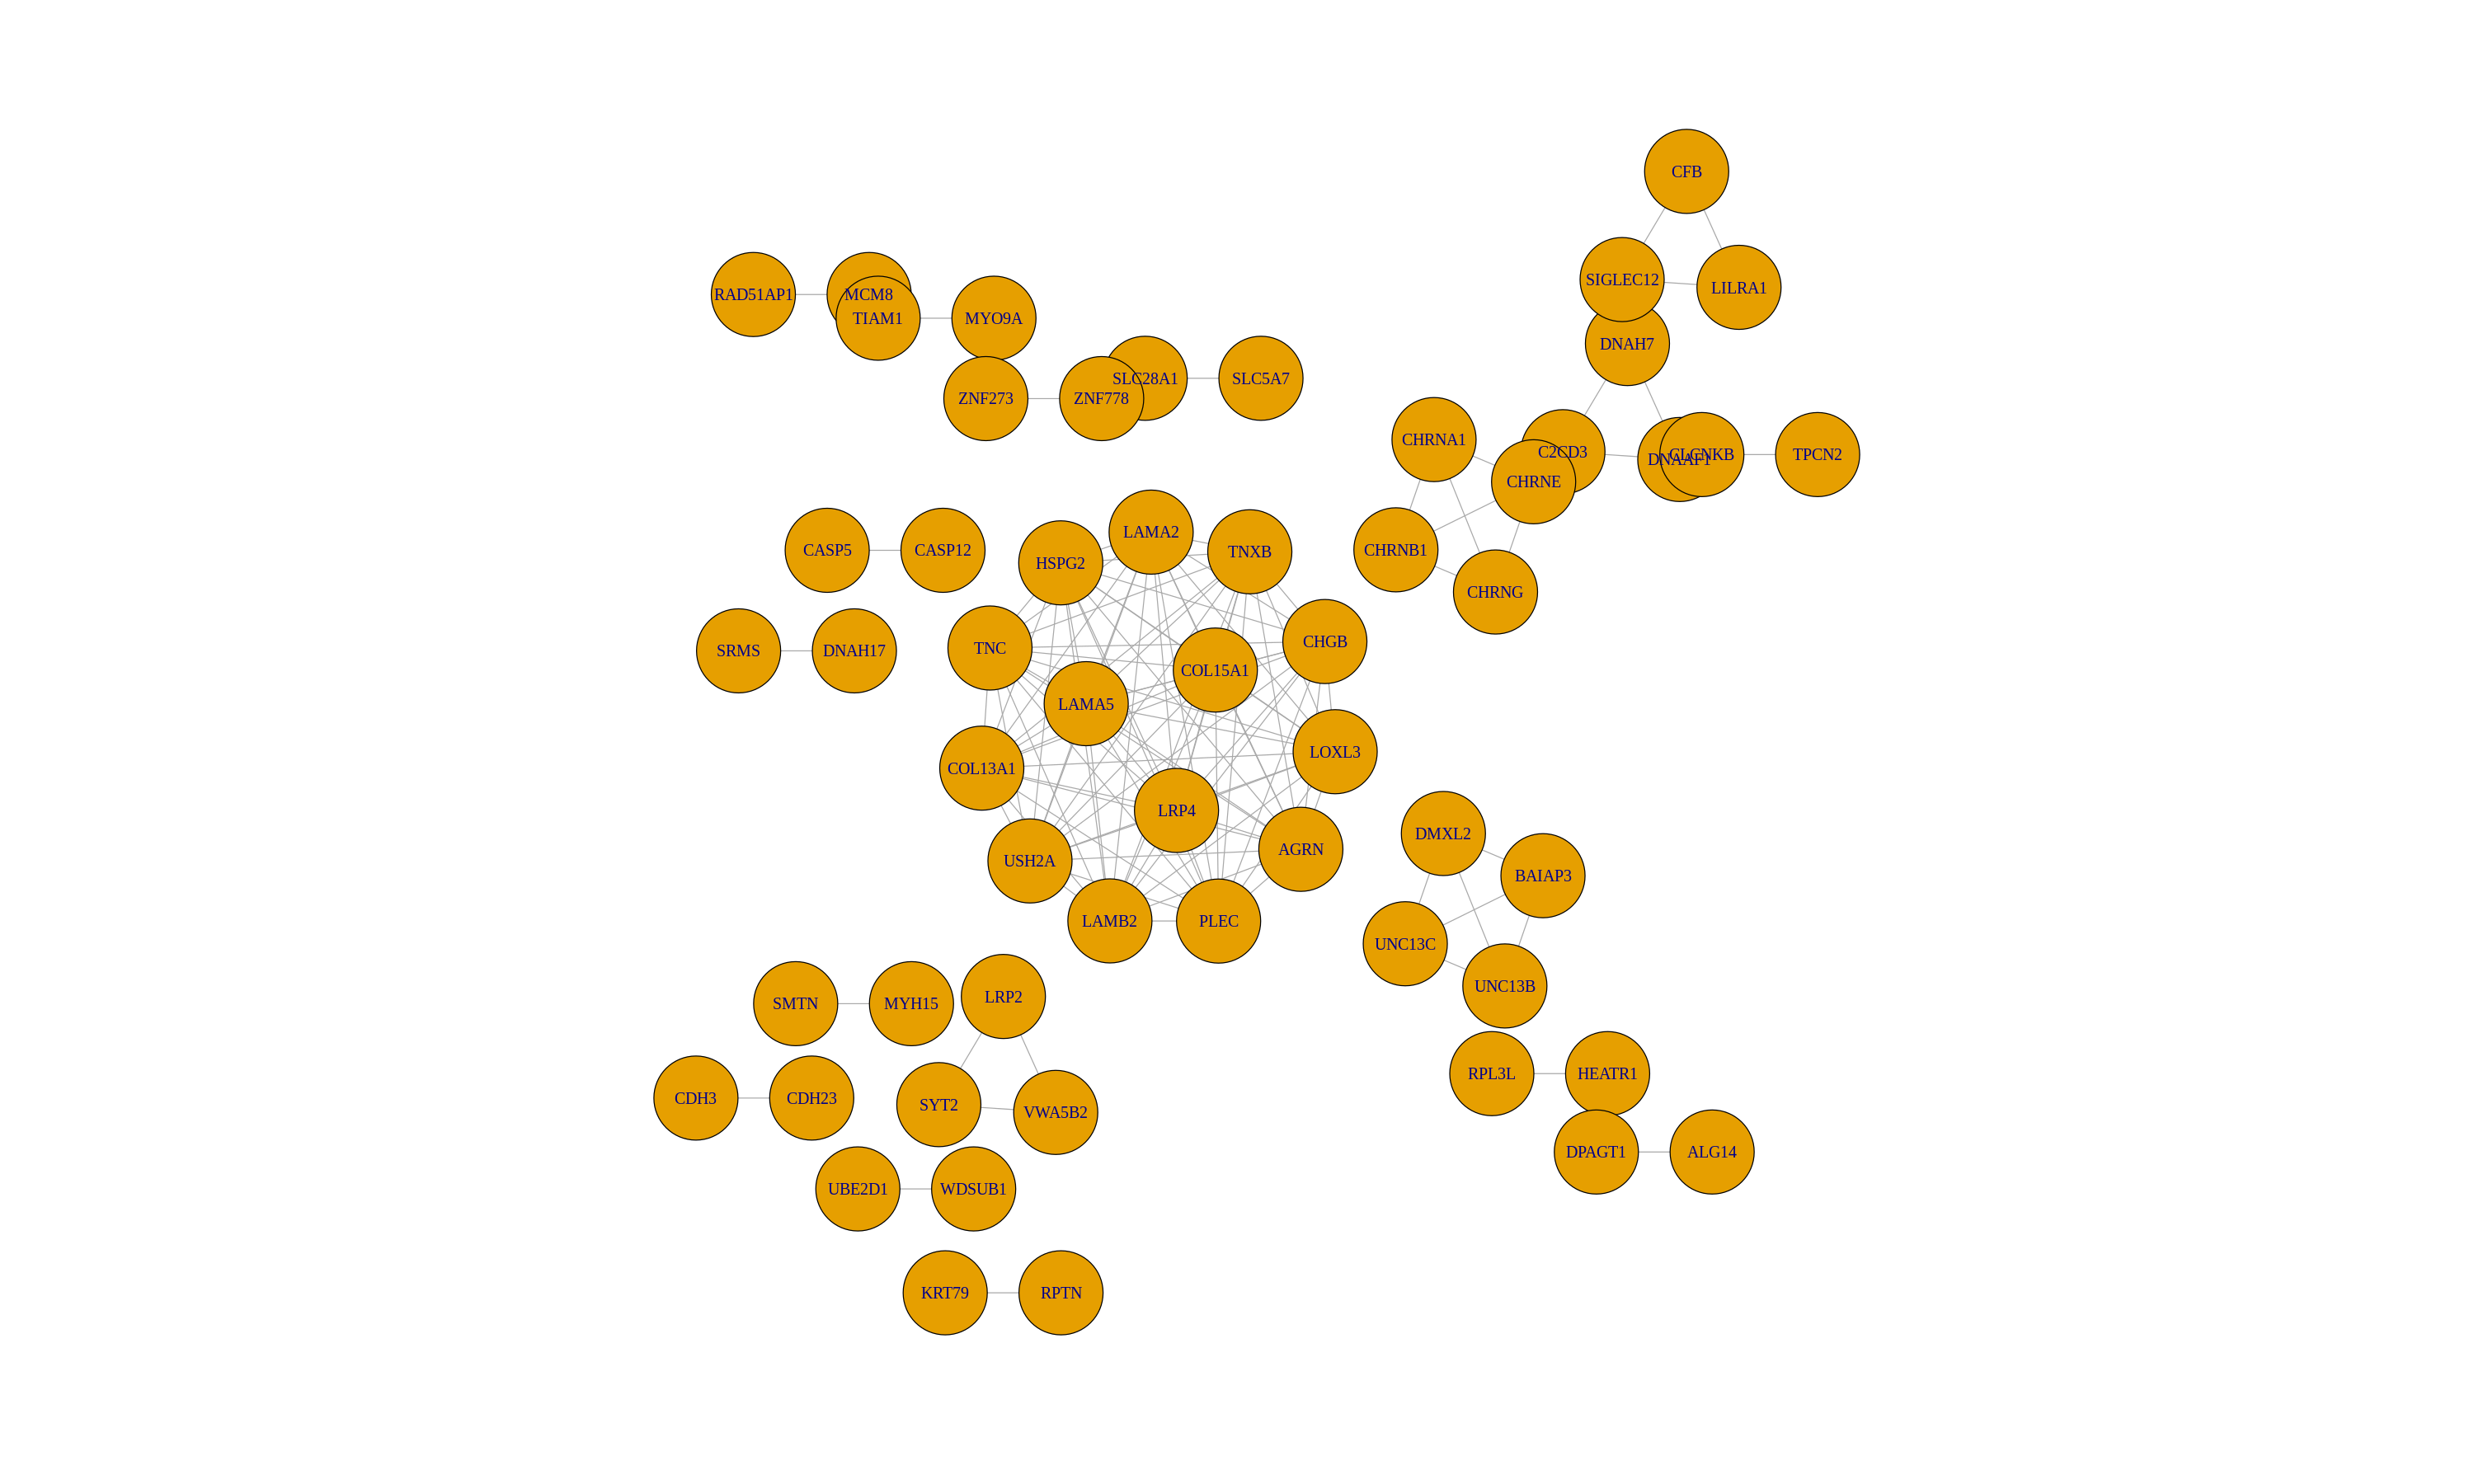

In [36]:
#test.layout <- layout_components(g,weight.edge.lengths = edge_density(g)/100)
options(repr.plot.width=25, repr.plot.height=15)
set.seed(2020) #seed for layout
plot(g, layout = layout_components)

#### Write CSV file for plotting with Cytoscape (Figure 4)

In [37]:
write.csv(x= as_edgelist(g),file= paste0(destfile,phenotype,".csv"),row.names=FALSE) 

Up to this point, code produced the figure 4 module as presented originally. From here, the first part of the code is focused on presenting the very same module, but including network neighbors of LOXL3, which, as we will see in the end of the script, is part of the Severe specific module, yet does not present diect connections with the rest of the module genes. This is because LOXL3 is connected to other genes that are not shown for not being either mutated in the patient, or being causal for the disease. 

### LOXL3 (EntrezID: 84695) interactome neighbors

In [38]:
interactome <- read.table(file= "data/Networks/InteractomaSinDuplciadosJurisica.csv")
interactome <- graph_from_data_frame(interactome[,1:2],directed = FALSE)
interactome

IGRAPH f6113c3 UN-- 18018 947606 -- 
+ attr: name (v/c)
+ edges from f6113c3 (vertex names):
 [1] 5662--23229  5662--7204   5662--5912   5662--161253 5662--2185  
 [6] 5662--391    5662--7316   5662--9545   5662--27314  5662--5921  
[11] 5662--11033  5662--377    5662--5873   5662--11124  5662--5924  
[16] 5662--53917  5662--57381  5662--10981  5662--6712   5662--4893  
[21] 5662--5868   5662--2159   5662--9364   5662--9826   5662--3265  
[26] 5662--5865   5662--5898   5662--10672  5662--2776   5662--115761
[31] 5662--3845   5662--3925   5662--9265   5662--54509  5662--26034 
[36] 5662--22808  5662--10966  5662--23527  5662--379    5662--387   
+ ... omitted several edges

In [39]:
vecinos_loxl3 <- mapIds(org.Hs.eg.db,keys = neighbors(interactome,'84695')$name,column = "SYMBOL",keytype="ENTREZID",multiVals = "first")
vecinos_loxl3_int <- vecinos_loxl3
vecinos_loxl3_int

'select()' returned 1:1 mapping between keys and columns


9349      9685      3309      2335    112936      4052      9695    205564 
  "RPL23"  "CLINT1"   "HSPA5"     "FN1"  "VPS26B"   "LTBP1"   "EDEM1"   "SENP5" 
     4440     57459     51162     79070    124540     51684    283316     57136 
   "MSI1" "GATAD2B"   "EGFL7" "POGLUT2"    "MSI2"    "SUFU" "CD163L1"   "APMAP"

#### Check hamming distance to module genes

In [40]:
melted_dist <- as.matrix(parallelDist(res,'hamming',threads = 7)*9) #Machine has 8 threads.

In [41]:
neighbors(interactome,'84695')$name[neighbors(interactome,'84695')$name %in% colnames(melted_dist)]

[1] "9349"   "9685"   "3309"   "112936" "4052"   "9695"   "205564" "4440"  
 [9] "57459"  "51162"  "79070"  "51684"  "283316" "57136"

In [42]:
melted_dist <- melted_dist[c(genescausales,neighbors(interactome,'84695')$name[neighbors(interactome,'84695')$name %in% colnames(melted_dist)]),c(genescausales,neighbors(interactome,'84695')$name[neighbors(interactome,'84695')$name %in% colnames(melted_dist)])]

In [43]:
rownames(melted_dist) <- mapIds(org.Hs.eg.db,keys = rownames(melted_dist),column = "SYMBOL",keytype="ENTREZID",multiVals = "first")
colnames(melted_dist) <- rownames(melted_dist)

'select()' returned 1:1 mapping between keys and columns


In [44]:
melted_dist <- melt(melted_dist)
#write.table(melted_dist[!is.na(melted_dist[,3]),],file='data/All_Communities_hamming_distance.csv',row.names = F,col.names = T,quote=F,sep=',') #Input for Figure 3 plots in Cytoscape!
melted_dist <- melted_dist[melted_dist[,3]==0,] # Get pairs that are always together trough resolution
melted_dist <- na.omit(melted_dist)
dim(melted_dist)

[1] 517   3

In [45]:
head(melted_dist)

,Var1,Var2,value
1,AGRN,AGRN,0
10,HSPG2,AGRN,0
24,LOXL3,AGRN,0
41,TNXB,AGRN,0
47,CHGB,AGRN,0
58,COL15A1,AGRN,0


In [46]:
g=simplify(graph_from_data_frame(as.matrix(melted_dist[,1:2]),directed = F))
g

IGRAPH c2091c2 UN-- 130 176 -- 
+ attr: name (v/c)
+ edges from c2091c2 (vertex names):
 [1] AGRN --HSPG2   AGRN --LOXL3   AGRN --TNXB    AGRN --CHGB    AGRN --COL15A1
 [6] AGRN --LAMA2   AGRN --TNC     AGRN --COL13A1 AGRN --LAMA5   AGRN --LAMB2  
[11] AGRN --LRP4    AGRN --PLEC    AGRN --USH2A   AGRN --LTBP1   AGRN --EGFL7  
[16] AGRN --CD163L1 HSPG2--LOXL3   HSPG2--TNXB    HSPG2--CHGB    HSPG2--COL15A1
[21] HSPG2--LAMA2   HSPG2--TNC     HSPG2--COL13A1 HSPG2--LAMA5   HSPG2--LAMB2  
[26] HSPG2--LRP4    HSPG2--PLEC    HSPG2--USH2A   HSPG2--LTBP1   HSPG2--EGFL7  
[31] HSPG2--CD163L1 LOXL3--TNXB    LOXL3--CHGB    LOXL3--COL15A1 LOXL3--LAMA2  
[36] LOXL3--TNC     LOXL3--COL13A1 LOXL3--LAMA5   LOXL3--LAMB2   LOXL3--LRP4   
+ ... omitted several edges

In [47]:
layouts <- grep("^layout_", ls("package:igraph"), value=TRUE)[-1]
layouts

[1] "layout_as_bipartite"  "layout_as_star"       "layout_as_tree"      
 [4] "layout_components"    "layout_in_circle"     "layout_nicely"       
 [7] "layout_on_grid"       "layout_on_sphere"     "layout_randomly"     
[10] "layout_with_dh"       "layout_with_drl"      "layout_with_fr"      
[13] "layout_with_gem"      "layout_with_graphopt" "layout_with_kk"      
[16] "layout_with_lgl"      "layout_with_mds"      "layout_with_sugiyama"

### Representation of the same module, now showing genes with CNV mutations, CHVs, causal CMS genes and  all interactome interactors of LOXL3.

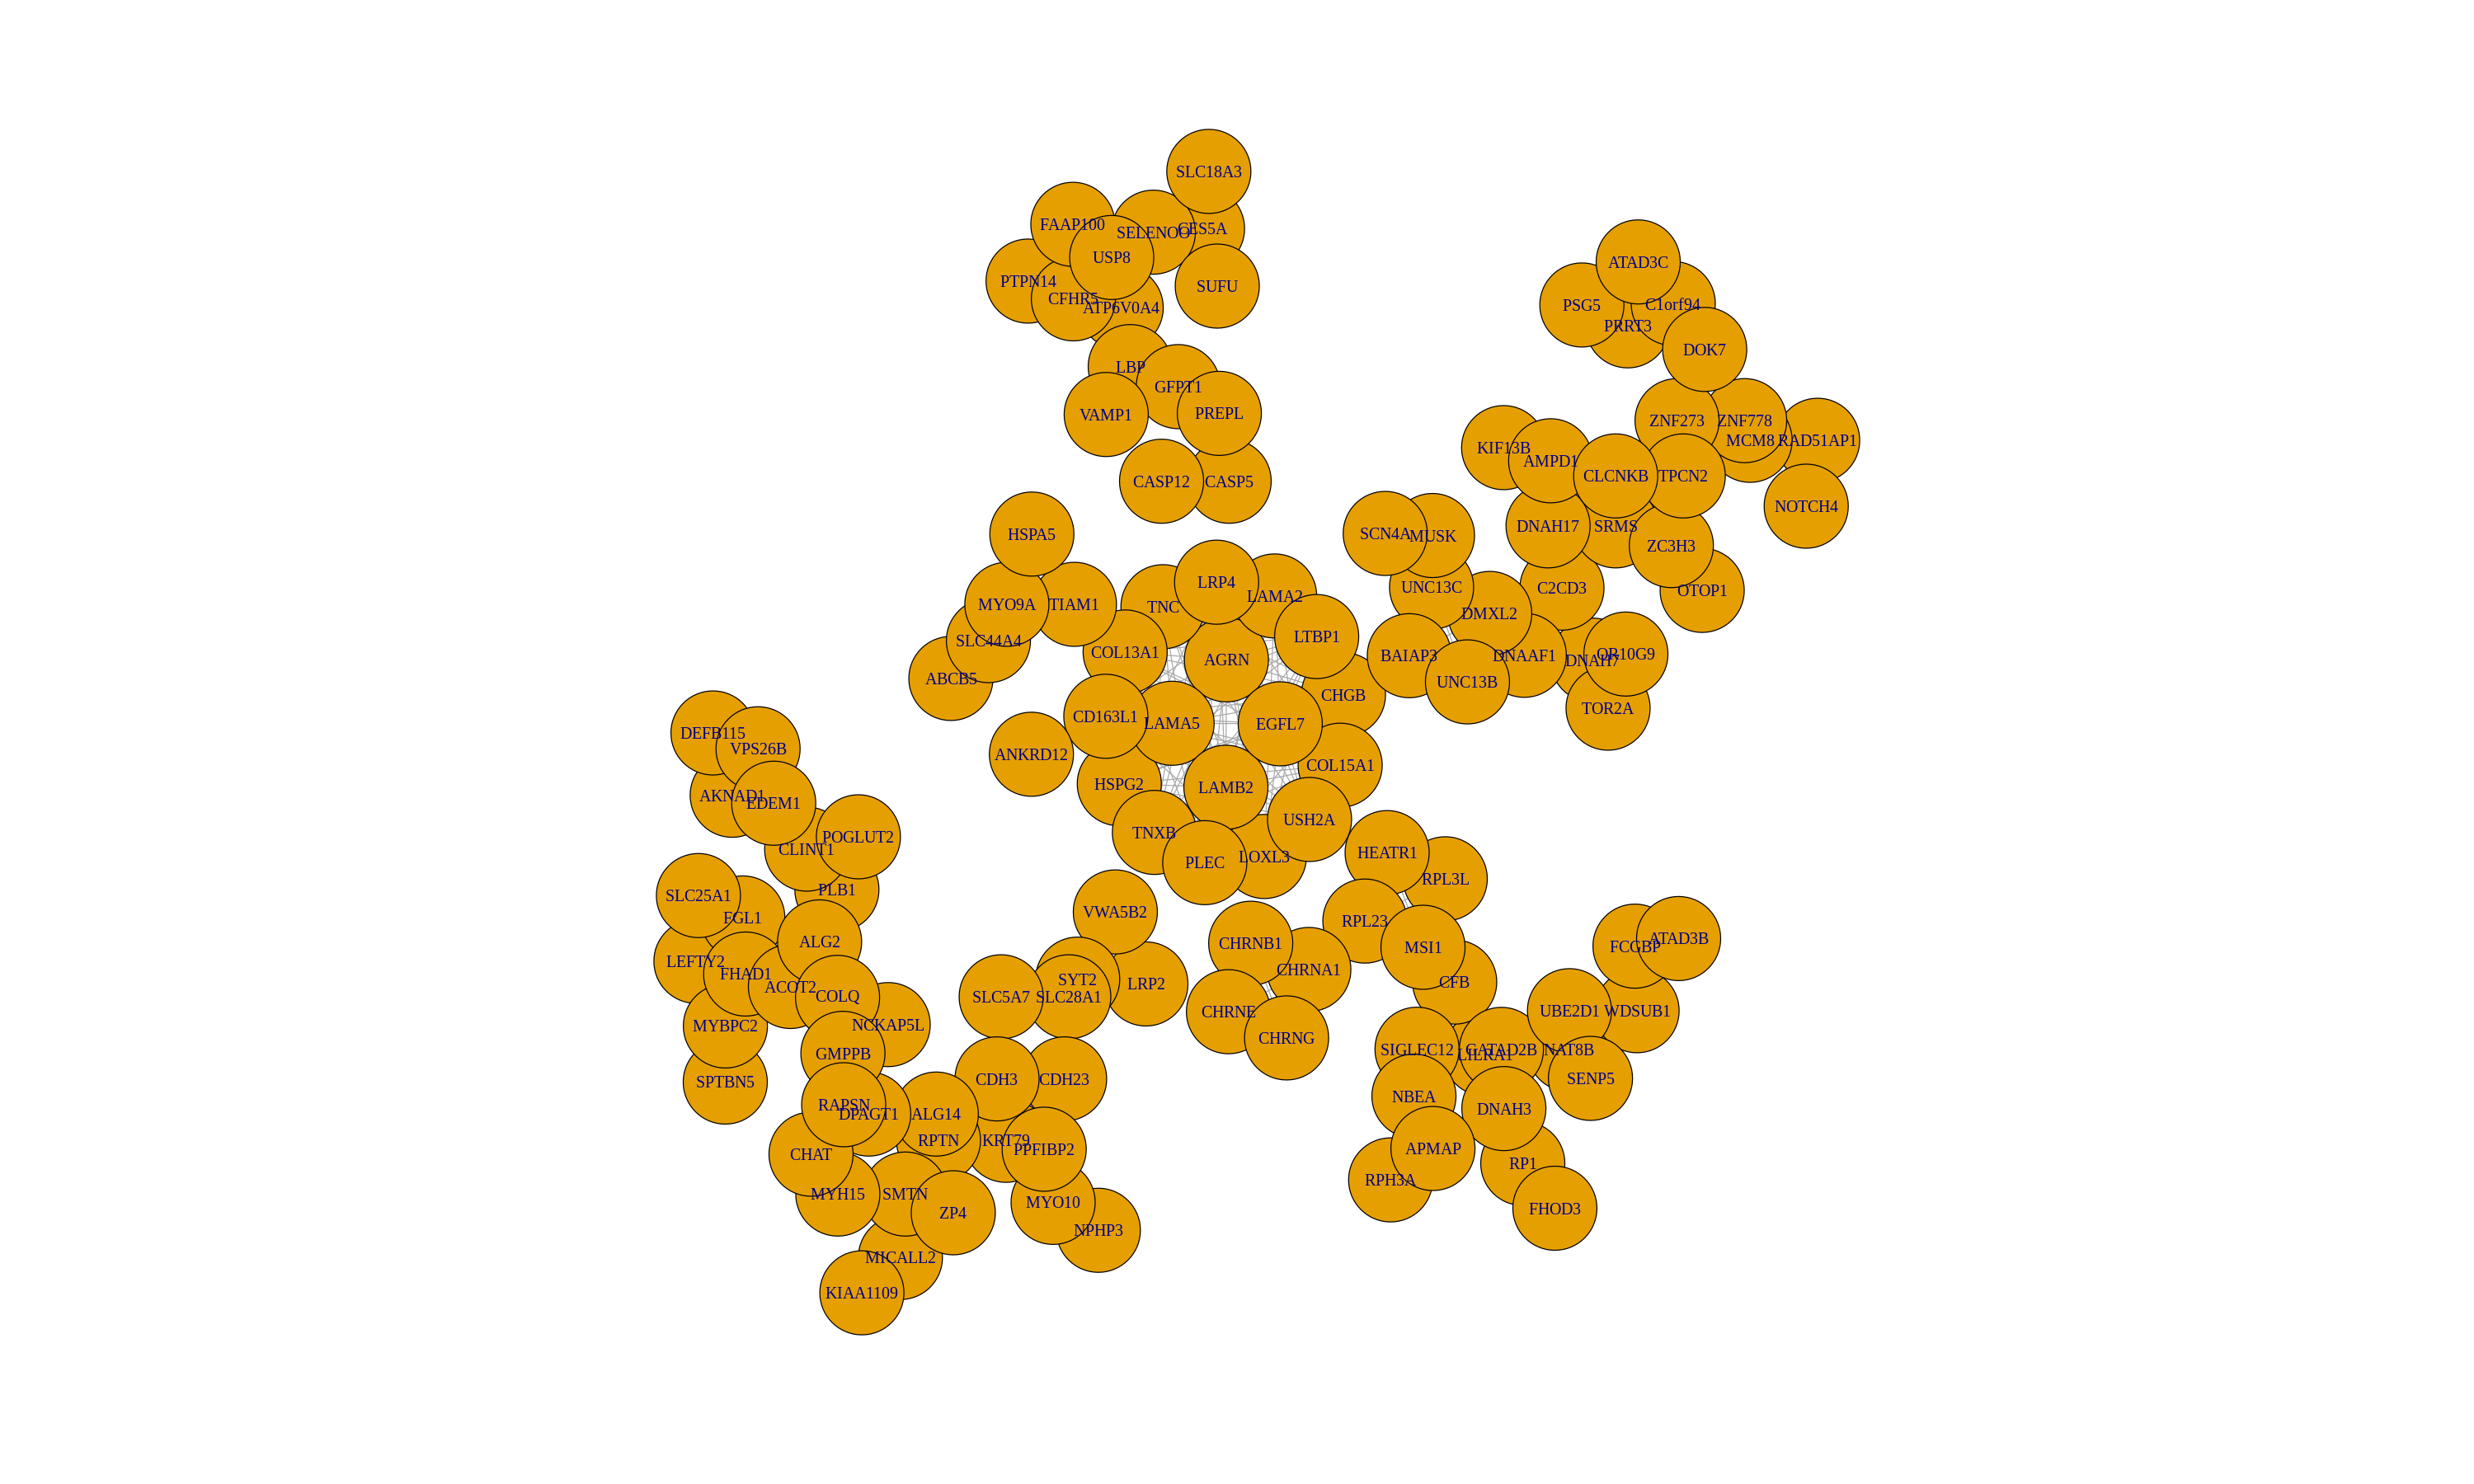

In [48]:
#test.layout <- layout_components(g,weight.edge.lengths = edge_density(g)/100)
options(repr.plot.width=25, repr.plot.height=15)
set.seed(2020) #seed for layout
plot(g, layout = layout_components)

In [49]:
components(g)$membership[components(g)$membership==1]

AGRN   HSPG2   LOXL3    TNXB    CHGB COL15A1   LAMA2     TNC COL13A1   LAMA5 
      1       1       1       1       1       1       1       1       1       1 
  LAMB2    LRP4    PLEC   USH2A   LTBP1   EGFL7 CD163L1 
      1       1       1       1       1       1       1

### LOXL3 (EntrezID: 84695) Reactome neighbors

In [50]:
reactome <- read.table(file= "data/Networks/ReactomeSinDuplicados.csv")
reactome <- graph_from_data_frame(reactome[,1:2],directed = FALSE)
reactome

IGRAPH ce8a56b UN-- 10618 875436 -- 
+ attr: name (v/c)
+ edges from ce8a56b (vertex names):
 [1] 7879  --22931     56656 --282763    22863 --100526767 55540 --132014   
 [5] 1816  --5138      5879  --51316     8836  --11314     5802  --84631    
 [9] 3163  --79901     3157  --6604      4670  --8926      3660  --4778     
[13] 898   --5713      3846  --100533177 10735 --554313    9306  --26263    
[17] 6572  --29924     121129--219473    4237  --90187     22909 --80198    
[21] 22919 --26005     5688  --8354      80351 --728419    11187 --199834   
[25] 64324 --79813     3312  --23601     10396 --53831     817   --2261     
[29] 23517 --57647     3015  --8368      2859  --2863      26048 --199704   
+ ... omitted several edges

In [51]:
vecinos_loxl3 <- mapIds(org.Hs.eg.db,keys = neighbors(reactome,'84695')$name,column = "SYMBOL",keytype="ENTREZID",multiVals = "first")
vecinos_loxl3_react <- vecinos_loxl3
vecinos_loxl3_react

'select()' returned 1:1 mapping between keys and columns


4237     3694     1277     1282      649     3688     1284     5045 
 "MFAP2"  "ITGB6" "COL1A1" "COL4A1"   "BMP1"  "ITGB1" "COL4A2"  "FURIN" 
    1287     1278     1285     3685     2200     3678     3690     1286 
"COL4A5" "COL1A2" "COL4A3"  "ITGAV"   "FBN1"  "ITGA5"  "ITGB3" "COL4A4" 
    2006     1288     2201     7092     5118     8076     7837    84467 
   "ELN" "COL4A6"   "FBN2"   "TLL1" "PCOLCE"  "MFAP5"   "PXDN"   "FBN3" 
    7093    10516     4015    84171     4016     4017 
  "TLL2"  "FBLN5"    "LOX"  "LOXL4"  "LOXL1"  "LOXL2"

#### Check hamming distance to module genes

In [52]:
melted_dist <- as.matrix(parallelDist(res,'hamming',threads = 7)*9) #Machine has 8 threads.

In [53]:
neighbors(reactome,'84695')$name[neighbors(reactome,'84695')$name %in% colnames(melted_dist)]

[1] "4237"  "3694"  "1282"  "649"   "3688"  "1284"  "5045"  "1287"  "1278" 
[10] "1285"  "3685"  "2200"  "3678"  "3690"  "1286"  "2006"  "1288"  "2201" 
[19] "7092"  "5118"  "8076"  "7837"  "84467" "7093"  "10516" "4015"  "84171"
[28] "4016"  "4017"

In [54]:
melted_dist <- melted_dist[c(genescausales,neighbors(reactome,'84695')$name[neighbors(reactome,'84695')$name %in% colnames(melted_dist)]),c(genescausales,neighbors(reactome,'84695')$name[neighbors(reactome,'84695')$name %in% colnames(melted_dist)])]

In [55]:
rownames(melted_dist) <- mapIds(org.Hs.eg.db,keys = rownames(melted_dist),column = "SYMBOL",keytype="ENTREZID",multiVals = "first")
colnames(melted_dist) <- rownames(melted_dist)

'select()' returned 1:1 mapping between keys and columns


In [56]:
melted_dist <- melt(melted_dist)
#write.table(melted_dist[!is.na(melted_dist[,3]),],file='data/All_Communities_hamming_distance.csv',row.names = F,col.names = T,quote=F,sep=',') #Input for Figure 3 plots in Cytoscape!
melted_dist <- melted_dist[melted_dist[,3]==0,] # Get pairs that are always together trough resolution
melted_dist <- na.omit(melted_dist)
dim(melted_dist)

[1] 1696    3

In [57]:
head(melted_dist)

,Var1,Var2,value
1,AGRN,AGRN,0
10,HSPG2,AGRN,0
24,LOXL3,AGRN,0
41,TNXB,AGRN,0
47,CHGB,AGRN,0
58,COL15A1,AGRN,0


In [58]:
g=simplify(graph_from_data_frame(as.matrix(melted_dist[,1:2]),directed = F))
g

IGRAPH 18bc801 UN-- 145 737 -- 
+ attr: name (v/c)
+ edges from 18bc801 (vertex names):
 [1] AGRN --HSPG2   AGRN --LOXL3   AGRN --TNXB    AGRN --CHGB    AGRN --COL15A1
 [6] AGRN --LAMA2   AGRN --TNC     AGRN --COL13A1 AGRN --LAMA5   AGRN --LAMB2  
[11] AGRN --LRP4    AGRN --PLEC    AGRN --USH2A   AGRN --MFAP2   AGRN --ITGB6  
[16] AGRN --COL4A1  AGRN --BMP1    AGRN --ITGB1   AGRN --COL4A2  AGRN --COL1A2 
[21] AGRN --COL4A3  AGRN --FBN1    AGRN --ITGA5   AGRN --ITGB3   AGRN --COL4A4 
[26] AGRN --ELN     AGRN --COL4A6  AGRN --FBN2    AGRN --TLL1    AGRN --PCOLCE 
[31] AGRN --MFAP5   AGRN --FBN3    AGRN --TLL2    AGRN --FBLN5   AGRN --LOX    
[36] AGRN --LOXL4   AGRN --LOXL1   HSPG2--LOXL3   HSPG2--TNXB    HSPG2--CHGB   
+ ... omitted several edges

In [59]:
layouts <- grep("^layout_", ls("package:igraph"), value=TRUE)[-1]
layouts

[1] "layout_as_bipartite"  "layout_as_star"       "layout_as_tree"      
 [4] "layout_components"    "layout_in_circle"     "layout_nicely"       
 [7] "layout_on_grid"       "layout_on_sphere"     "layout_randomly"     
[10] "layout_with_dh"       "layout_with_drl"      "layout_with_fr"      
[13] "layout_with_gem"      "layout_with_graphopt" "layout_with_kk"      
[16] "layout_with_lgl"      "layout_with_mds"      "layout_with_sugiyama"

### Representation of the same module, now showing genes with CNV mutations, CHVs, causal CMS genes and  all reactome interactors of LOXL3.

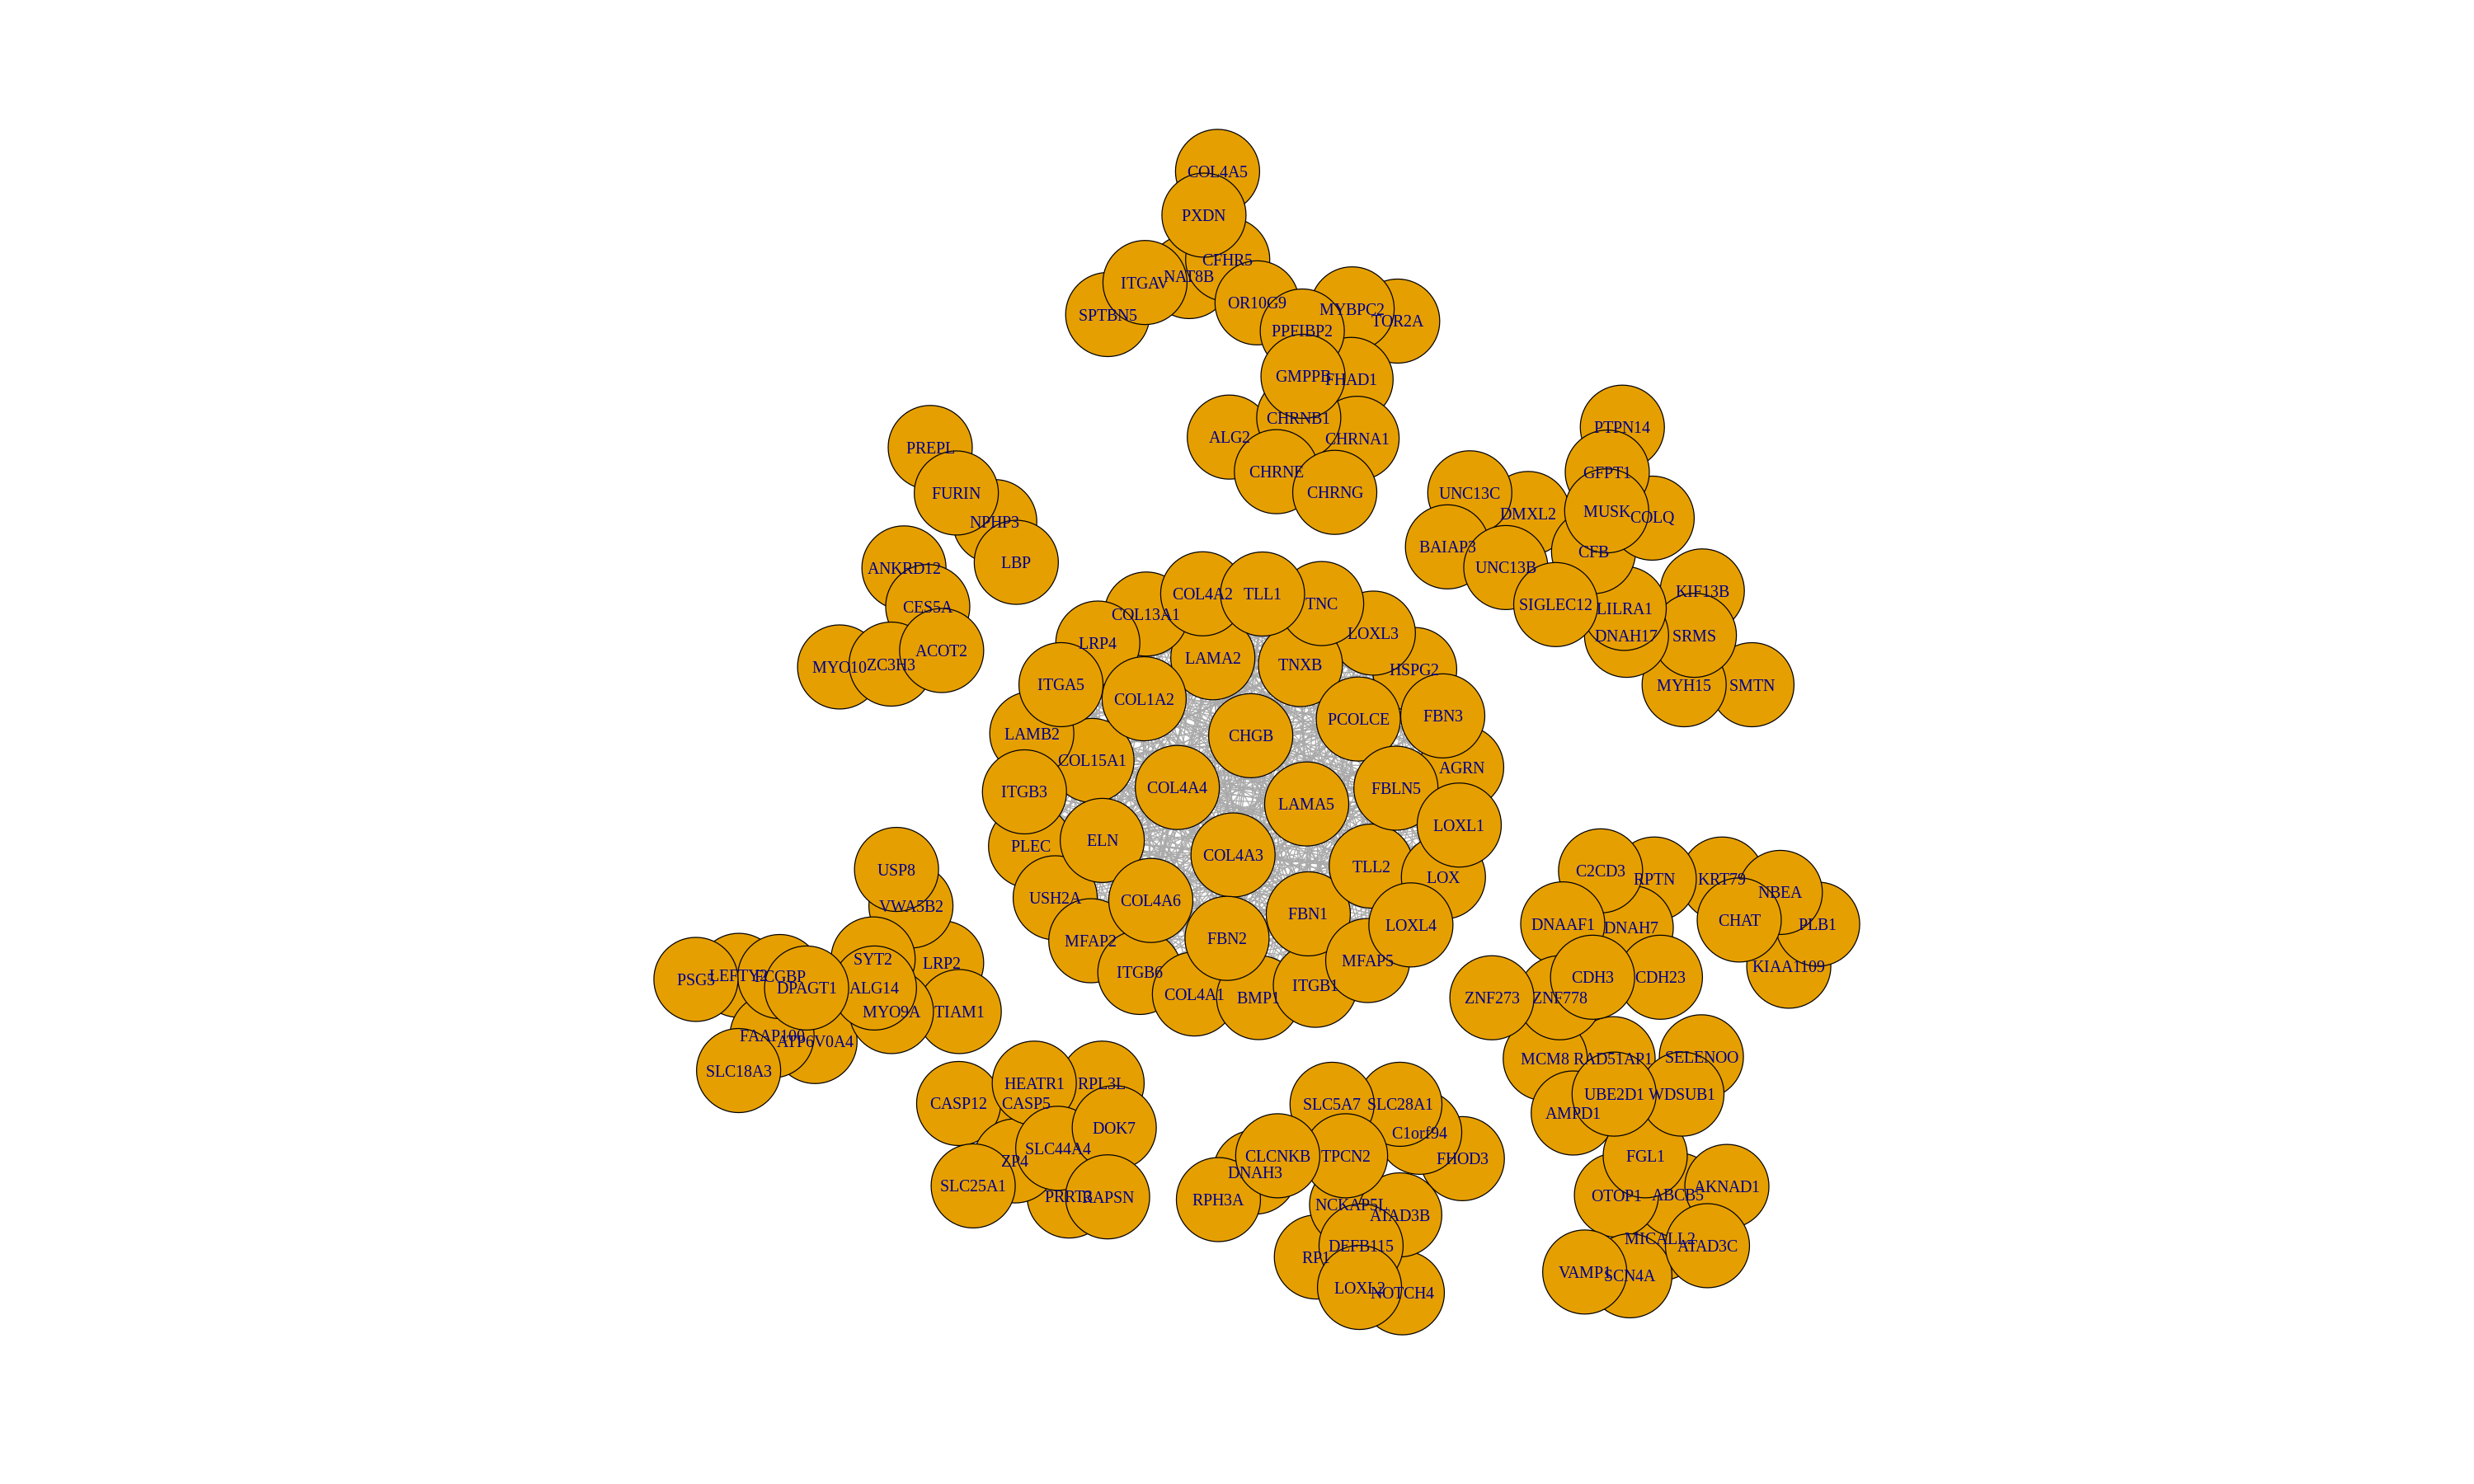

In [60]:
#test.layout <- layout_components(g,weight.edge.lengths = edge_density(g)/100)
options(repr.plot.width=25, repr.plot.height=15)
set.seed(2020) #seed for layout
plot(g, layout = layout_components)

In [61]:
components(g)$membership[components(g)$membership==1]

AGRN   HSPG2   LOXL3    TNXB    CHGB COL15A1   LAMA2     TNC COL13A1   LAMA5 
      1       1       1       1       1       1       1       1       1       1 
  LAMB2    LRP4    PLEC   USH2A   MFAP2   ITGB6  COL4A1    BMP1   ITGB1  COL4A2 
      1       1       1       1       1       1       1       1       1       1 
 COL1A2  COL4A3    FBN1   ITGA5   ITGB3  COL4A4     ELN  COL4A6    FBN2    TLL1 
      1       1       1       1       1       1       1       1       1       1 
 PCOLCE   MFAP5    FBN3    TLL2   FBLN5     LOX   LOXL4   LOXL1 
      1       1       1       1       1       1       1       1

#### Interactome layer

#### Finally, we obtain the layer subgraphs corresponding to module genes, to plot as connection types in Figure 4.


In [63]:
if(phenotype=='severe'){
    interesting_module <- c('PLEC','VCAN','TNXB','LOXL3','LAMB2','LRP4','HSPG2','LAMA5','COL13A1','TNC','USH2A','LAMA2','CHGB','AGRN','COL15A1')
    interesting_module_2 <- c(interesting_module,vecinos_loxl3_int)
} 
if(phenotype=='notsevere'){
    interesting_module <- c('LRP4','COL6A5','TLL2','MCAM','ADAMTS9','HMCN1','COL13A1','MSR1','LAMB2','LAMB4','LAMA5','ADAM28','PLEC','ITIH5','AGRN')
} 

#### Add LOXL3 interactors for plotting?

In [64]:
add_loxl3 <- TRUE
if(add_loxl3 == TRUE){
    interesting_module <- interesting_module_2
}

In [65]:
interesting_module <- mapIds(org.Hs.eg.db,keys = interesting_module,column = "ENTREZID",keytype="SYMBOL",multiVals = "first")
interesting_module

'select()' returned 1:1 mapping between keys and columns


PLEC     VCAN     TNXB    LOXL3    LAMB2     LRP4    HSPG2    LAMA5 
  "5339"   "1462"   "7148"  "84695"   "3913"   "4038"   "3339"   "3911" 
 COL13A1      TNC    USH2A    LAMA2     CHGB     AGRN  COL15A1    RPL23 
  "1305"   "3371"   "7399"   "3908"   "1114" "375790"   "1306"   "9349" 
  CLINT1    HSPA5      FN1   VPS26B    LTBP1    EDEM1    SENP5     MSI1 
  "9685"   "3309"   "2335" "112936"   "4052"   "9695" "205564"   "4440" 
 GATAD2B    EGFL7  POGLUT2     MSI2     SUFU  CD163L1    APMAP 
 "57459"  "51162"  "79070" "124540"  "51684" "283316"  "57136"

In [66]:
interactome <- read.table(file= "data/Networks/InteractomaSinDuplciadosJurisica.csv")
interactome <- graph_from_data_frame(interactome[,1:2],directed = FALSE)
interactome

IGRAPH 0fff613 UN-- 18018 947606 -- 
+ attr: name (v/c)
+ edges from 0fff613 (vertex names):
 [1] 5662--23229  5662--7204   5662--5912   5662--161253 5662--2185  
 [6] 5662--391    5662--7316   5662--9545   5662--27314  5662--5921  
[11] 5662--11033  5662--377    5662--5873   5662--11124  5662--5924  
[16] 5662--53917  5662--57381  5662--10981  5662--6712   5662--4893  
[21] 5662--5868   5662--2159   5662--9364   5662--9826   5662--3265  
[26] 5662--5865   5662--5898   5662--10672  5662--2776   5662--115761
[31] 5662--3845   5662--3925   5662--9265   5662--54509  5662--26034 
[36] 5662--22808  5662--10966  5662--23527  5662--379    5662--387   
+ ... omitted several edges

In [67]:
mini_int <- simplify(subgraph(interactome,interesting_module))

In [68]:
mini_int

IGRAPH 9d80919 UN-- 31 67 -- 
+ attr: name (v/c)
+ edges from 9d80919 (vertex names):
 [1] 9349  --84695  9349  --3309   9349  --2335   1462  --3371   1462  --2335  
 [6] 1462  --3911   1462  --1306   1462  --3913   375790--3908   375790--3371  
[11] 375790--2335   375790--3911   375790--7399   375790--3913   3908  --3339  
[16] 3908  --2335   3908  --3911   3908  --1306   3908  --7399   3908  --3913  
[21] 84695 --9685   84695 --3309   84695 --2335   84695 --112936 84695 --4052  
[26] 84695 --9695   84695 --205564 84695 --4440   84695 --57459  84695 --51162 
[31] 84695 --79070  84695 --124540 84695 --51684  84695 --283316 84695 --57136 
[36] 9685  --3309   3371  --3339   3371  --5339   3371  --2335   3371  --1306  
+ ... omitted several edges

In [69]:
V(mini_int)$name <- names(interesting_module)[match(V(mini_int)$name,interesting_module)]

In [70]:
uno <- data.frame(as_edgelist(mini_int),'ppi')

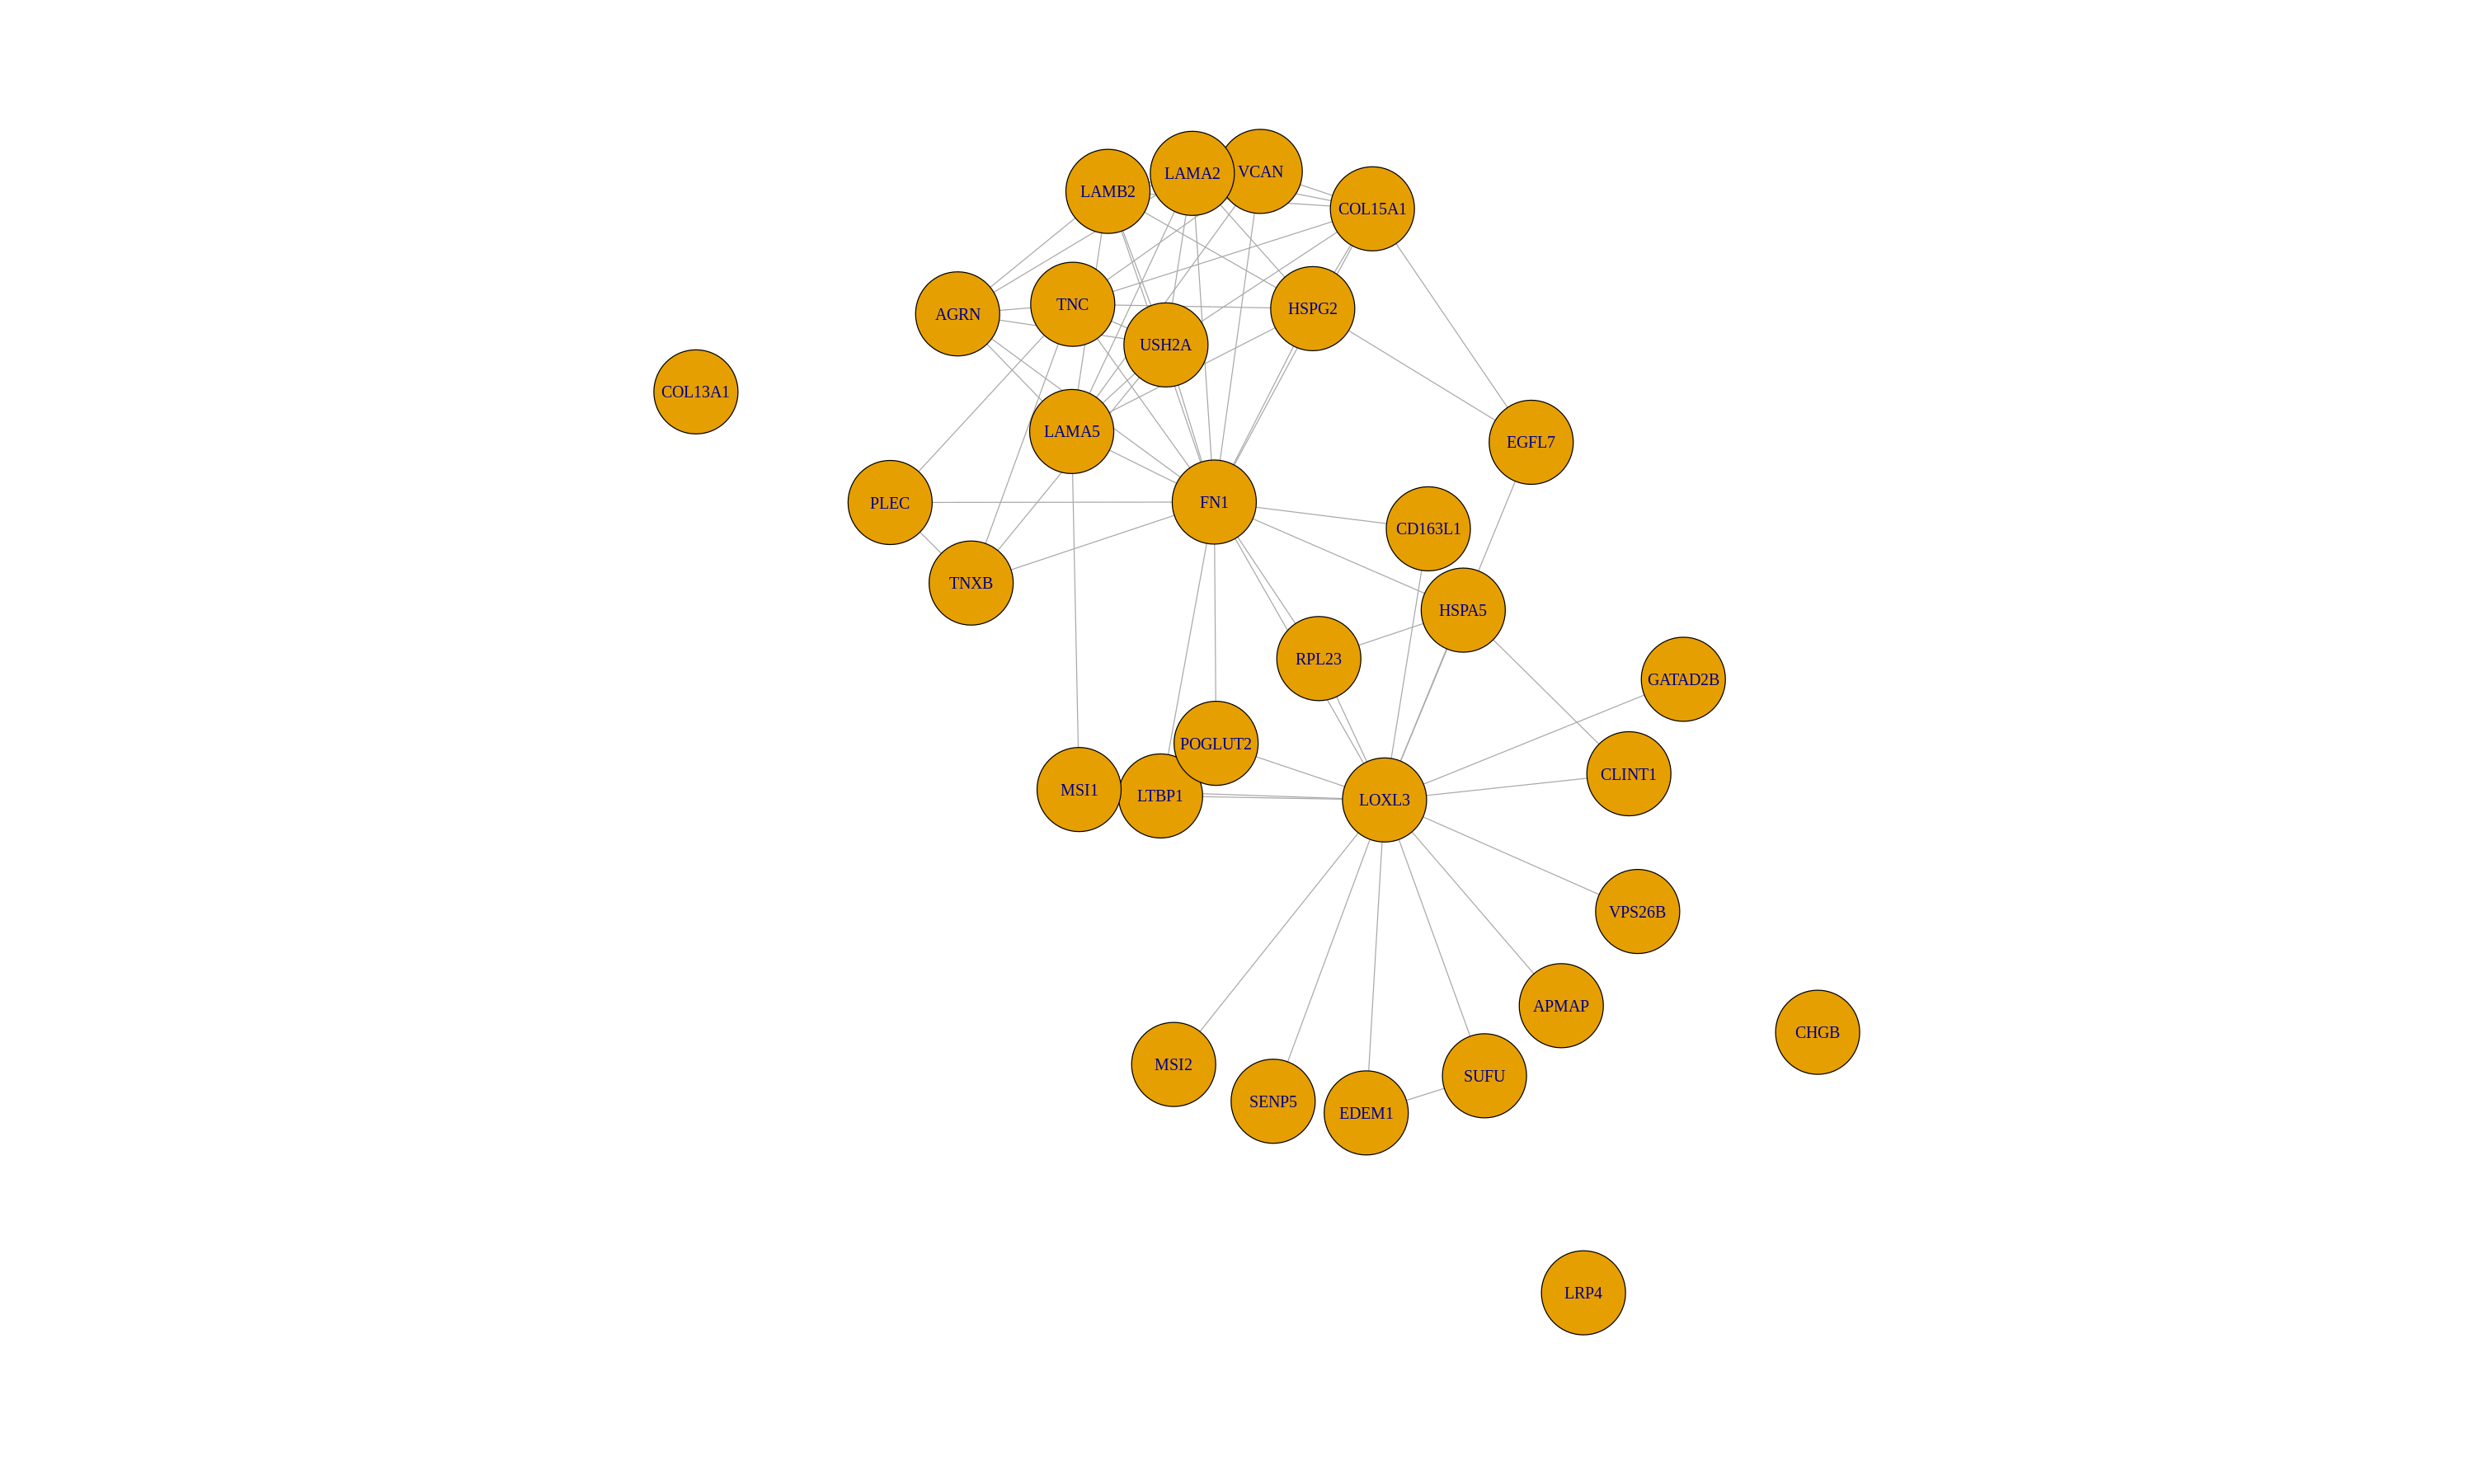

In [71]:
plot(mini_int, layout = layout_components)

#### Reactome

In [72]:
reactome <- read.table(file= "data/Networks/ReactomeSinDuplicados.csv")
reactome <- graph_from_data_frame(reactome,directed = FALSE)
reactome

IGRAPH 57264d0 UN-- 10618 875436 -- 
+ attr: name (v/c), V3 (e/c)
+ edges from 57264d0 (vertex names):
 [1] 7879  --22931     56656 --282763    22863 --100526767 55540 --132014   
 [5] 1816  --5138      5879  --51316     8836  --11314     5802  --84631    
 [9] 3163  --79901     3157  --6604      4670  --8926      3660  --4778     
[13] 898   --5713      3846  --100533177 10735 --554313    9306  --26263    
[17] 6572  --29924     121129--219473    4237  --90187     22909 --80198    
[21] 22919 --26005     5688  --8354      80351 --728419    11187 --199834   
[25] 64324 --79813     3312  --23601     10396 --53831     817   --2261     
[29] 23517 --57647     3015  --8368      2859  --2863      26048 --199704   
+ ... omitted several edges

In [74]:
if(phenotype=='severe'){
    interesting_module <- c('PLEC','VCAN','TNXB','LOXL3','LAMB2','LRP4','HSPG2','LAMA5','COL13A1','TNC','USH2A','LAMA2','CHGB','AGRN','COL15A1')
        interesting_module_2 <- c(interesting_module,vecinos_loxl3_react)
} 
if(phenotype=='notsevere'){
    interesting_module <- c('LRP4','COL6A5','TLL2','MCAM','ADAMTS9','HMCN1','COL13A1','MSR1','LAMB2','LAMB4','LAMA5','ADAM28','PLEC','ITIH5','AGRN')
} 

#### Add LOXL3 interactors for Reactome plotting?

In [75]:
add_loxl3 <- TRUE
if(add_loxl3 == TRUE){
    interesting_module <- interesting_module_2
    phenotype <- paste0(phenotype,'_withLOXL3interactors') #Only change output if adding LOXL3 interactors.
}

In [76]:
interesting_module <- mapIds(org.Hs.eg.db,keys = interesting_module,column = "ENTREZID",keytype="SYMBOL",multiVals = "first")
interesting_module

'select()' returned 1:1 mapping between keys and columns


PLEC     VCAN     TNXB    LOXL3    LAMB2     LRP4    HSPG2    LAMA5 
  "5339"   "1462"   "7148"  "84695"   "3913"   "4038"   "3339"   "3911" 
 COL13A1      TNC    USH2A    LAMA2     CHGB     AGRN  COL15A1    MFAP2 
  "1305"   "3371"   "7399"   "3908"   "1114" "375790"   "1306"   "4237" 
   ITGB6   COL1A1   COL4A1     BMP1    ITGB1   COL4A2    FURIN   COL4A5 
  "3694"   "1277"   "1282"    "649"   "3688"   "1284"   "5045"   "1287" 
  COL1A2   COL4A3    ITGAV     FBN1    ITGA5    ITGB3   COL4A4      ELN 
  "1278"   "1285"   "3685"   "2200"   "3678"   "3690"   "1286"   "2006" 
  COL4A6     FBN2     TLL1   PCOLCE    MFAP5     PXDN     FBN3     TLL2 
  "1288"   "2201"   "7092"   "5118"   "8076"   "7837"  "84467"   "7093" 
   FBLN5      LOX    LOXL4    LOXL1    LOXL2 
 "10516"   "4015"  "84171"   "4016"   "4017"

In [77]:
interesting_module %in% V(reactome)$name

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

In [78]:
cuales <- interesting_module[interesting_module %in% V(reactome)$name]

In [79]:
cuales

PLEC     VCAN     TNXB    LOXL3    LAMB2     LRP4    HSPG2    LAMA5 
  "5339"   "1462"   "7148"  "84695"   "3913"   "4038"   "3339"   "3911" 
 COL13A1      TNC    LAMA2     CHGB     AGRN  COL15A1    MFAP2    ITGB6 
  "1305"   "3371"   "3908"   "1114" "375790"   "1306"   "4237"   "3694" 
  COL1A1   COL4A1     BMP1    ITGB1   COL4A2    FURIN   COL4A5   COL1A2 
  "1277"   "1282"    "649"   "3688"   "1284"   "5045"   "1287"   "1278" 
  COL4A3    ITGAV     FBN1    ITGA5    ITGB3   COL4A4      ELN   COL4A6 
  "1285"   "3685"   "2200"   "3678"   "3690"   "1286"   "2006"   "1288" 
    FBN2     TLL1   PCOLCE    MFAP5     PXDN     FBN3     TLL2    FBLN5 
  "2201"   "7092"   "5118"   "8076"   "7837"  "84467"   "7093"  "10516" 
     LOX    LOXL4    LOXL1    LOXL2 
  "4015"  "84171"   "4016"   "4017"

In [80]:
mini_react <- simplify(subgraph(reactome,cuales))

In [81]:
mini_react

IGRAPH 8912271 UN-- 44 578 -- 
+ attr: name (v/c)
+ edges from 8912271 (vertex names):
 [1] 4237--3694  4237--3688  4237--5045  4237--3685  4237--2200  4237--3678 
 [7] 4237--3690  4237--2006  4237--2201  4237--8076  4237--84467 4237--10516
[13] 4237--4015  4237--84171 4237--4016  4237--4017  4237--84695 3694--1305 
[19] 3694--1277  3694--3339  3694--1282  3694--3688  3694--1284  3694--5045 
[25] 3694--1287  3694--1278  3694--1285  3694--3685  3694--2200  3694--1462 
[31] 3694--3371  3694--3678  3694--3690  3694--1286  3694--2006  3694--1288 
[37] 3694--4038  3694--2201  3694--3911  3694--3913  3694--3908  3694--8076 
[43] 3694--84467 3694--10516 3694--4015  3694--84171 3694--7148  3694--4016 
+ ... omitted several edges

In [82]:
V(mini_react)$name <- names(cuales)[match(V(mini_react)$name,cuales)]

In [83]:
dos <- data.frame(as_edgelist(mini_react),'pathways')

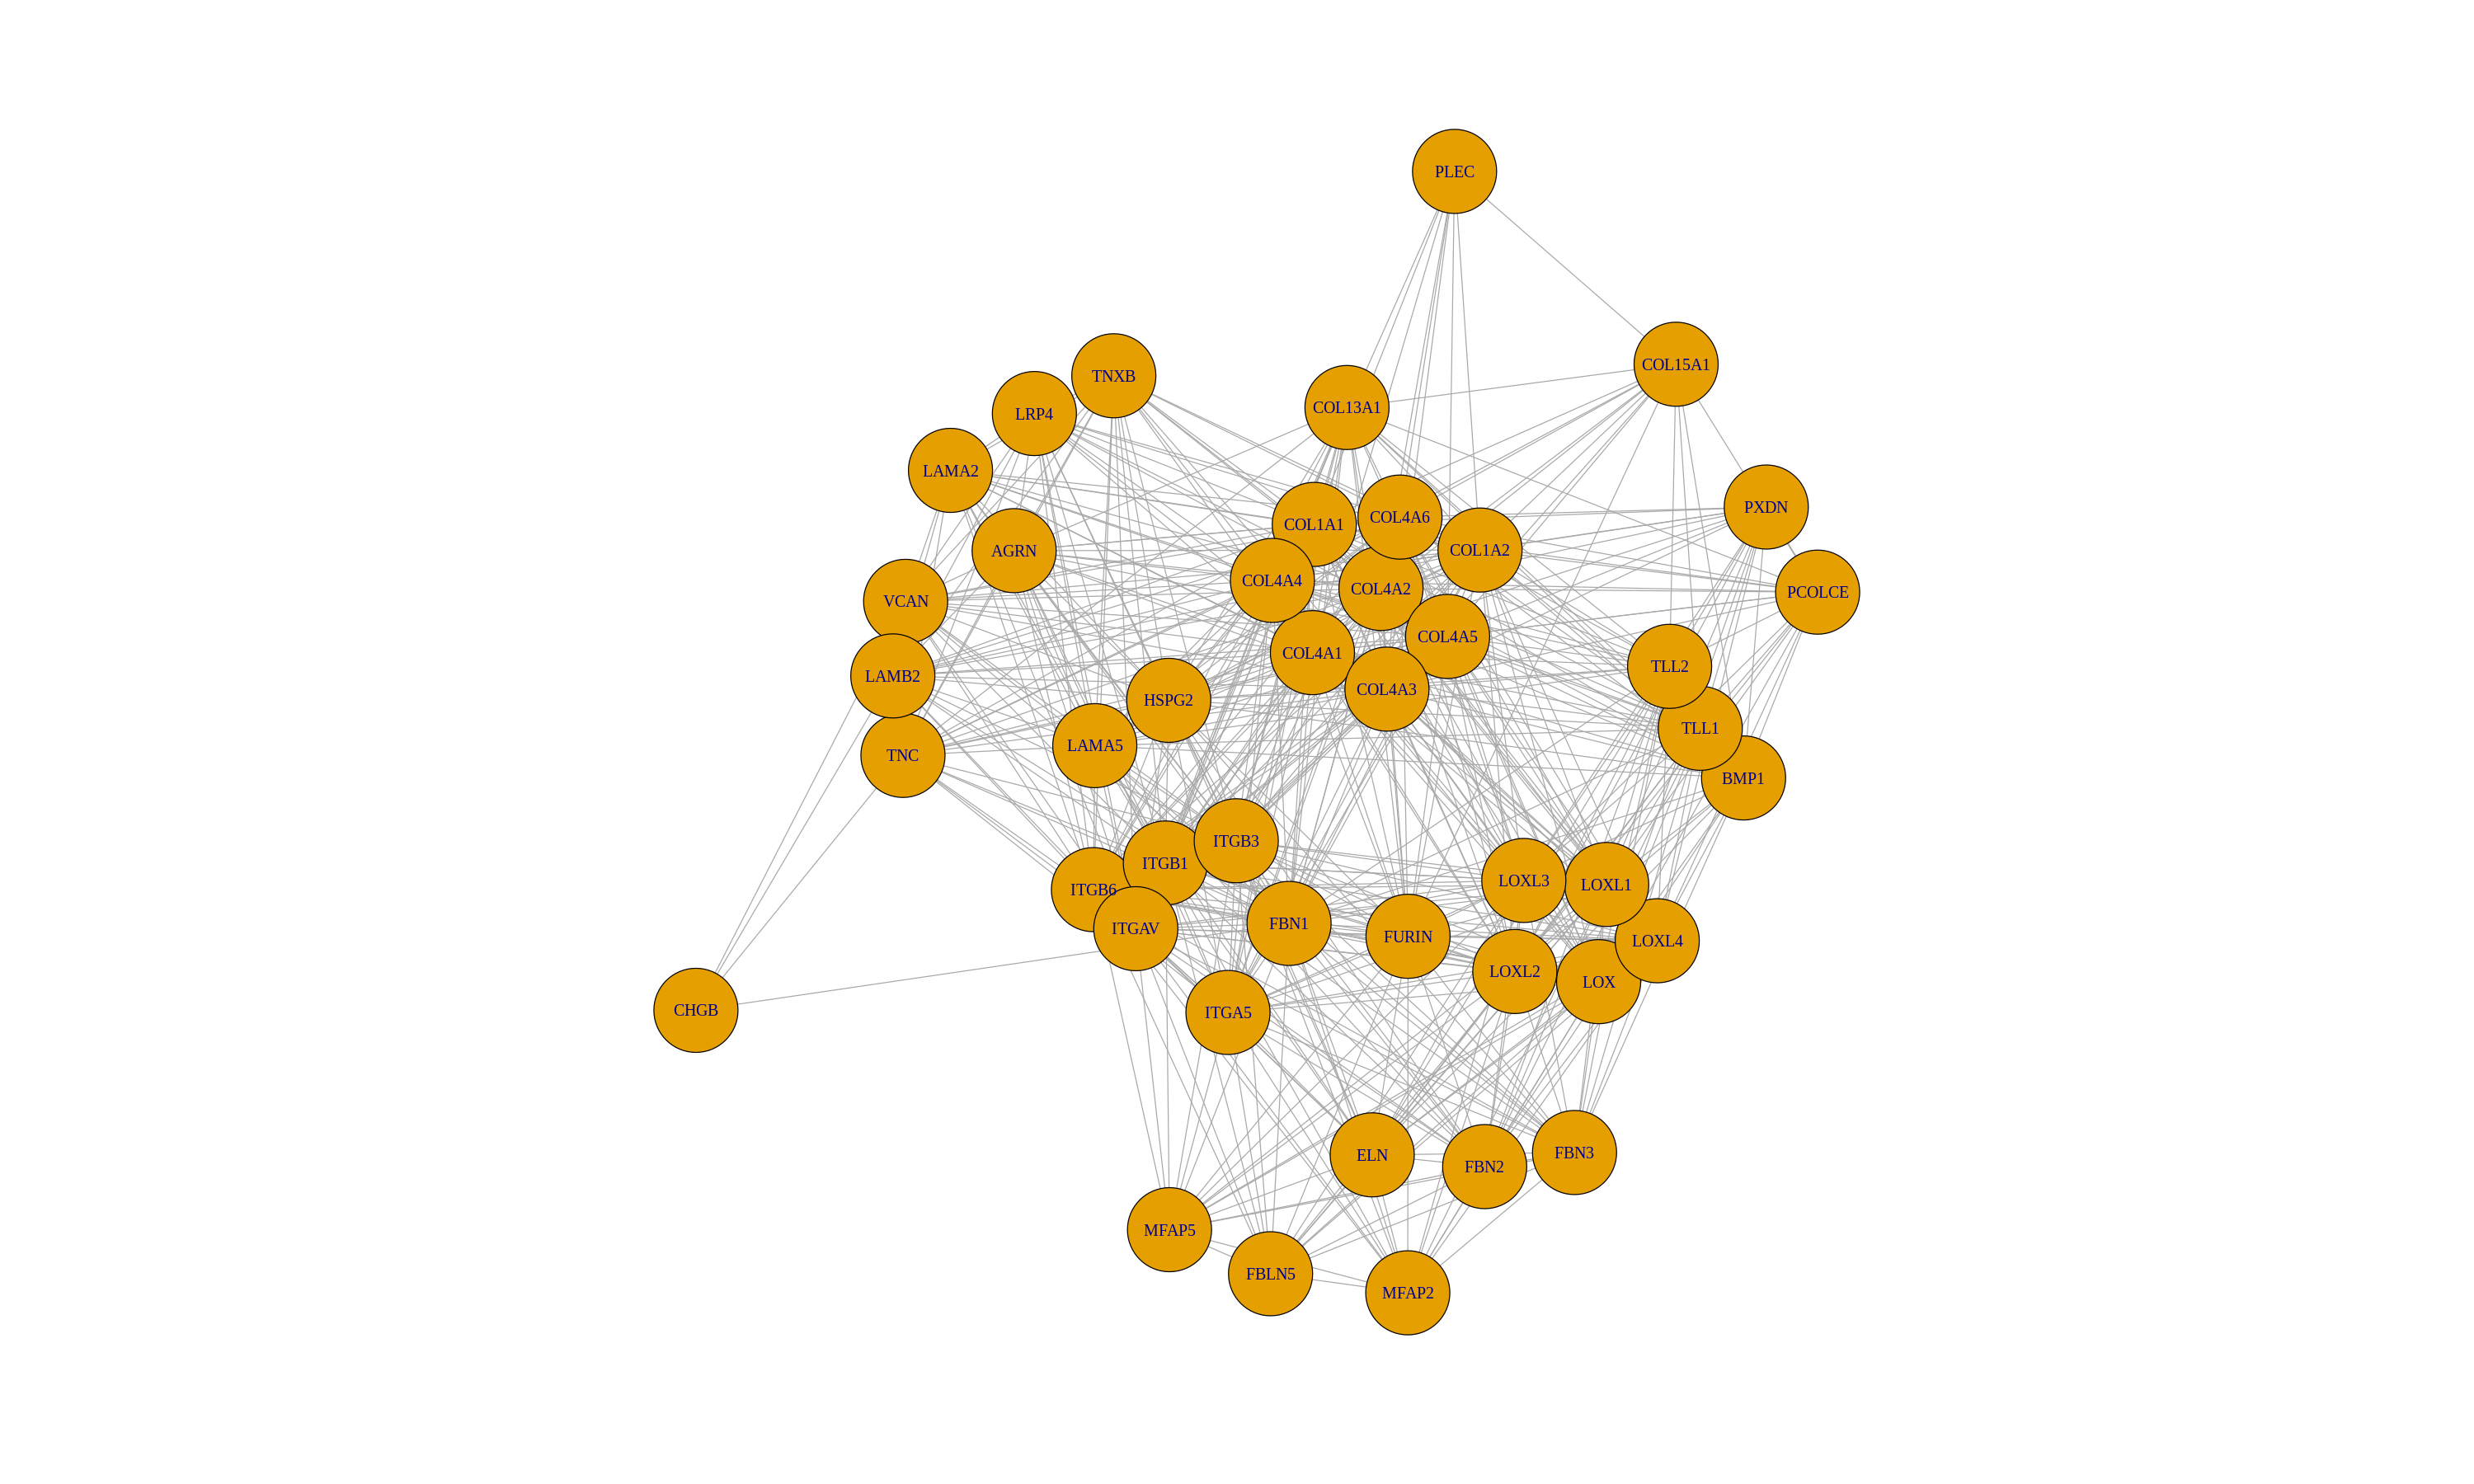

In [84]:
plot(mini_react, layout = layout_components)

In [85]:
final_graph <- rbind(as.matrix(uno),as.matrix(dos))

In [86]:
head(final_graph)
tail(final_graph)

X1,X2,X.ppi.
RPL23,LOXL3,ppi
RPL23,HSPA5,ppi
RPL23,FN1,ppi
VCAN,TNC,ppi
VCAN,FN1,ppi
VCAN,LAMA5,ppi


,X1,X2,X.ppi.
"[640,]",LOXL4,LOXL2,pathways
"[641,]",LOXL4,LOXL3,pathways
"[642,]",TNXB,AGRN,pathways
"[643,]",LOXL1,LOXL2,pathways
"[644,]",LOXL1,LOXL3,pathways
"[645,]",LOXL2,LOXL3,pathways


In [87]:
write.table(final_graph,file=paste0(destfile,phenotype,'.csv'),sep=',',col.names = F,row.names = F,quote=F)